# MODUL II: OPERASI DASAR CITRA_F1D021017

### SOAL 1
1. Lakukan operasi dibawah ini menggunakan gambar diatas:
-  translasi sejauh x = -50 dan y = 40
-  rotasi dengan sudut 70 derajat
-  pencerminan terhadap sumbu x dan sumbu y
-  dilatasi matriks dengan faktor skala = 3


### Import Library

Baris code di bawah ini digunakan untuk menginpor fungsi-fungsi yang akan digunakan dengan perincian
- matplotlib.pyplot digunakan untuk membuat grafik sederhana 2d
- numpy digunakan untuk membantu dalam membaca gambar ke dalam bentuk array
- cv2 atau OpenCV berfungsi untuk melakukan konversi color space.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from math import sin,cos

Fungsi imread digunakan untuk membaca suatu data citra dari file yang mana dalam code ini, file citra diberi nama cipung.jpg dan disimpan dalam variabel image

### Membaca Citra Asli

In [2]:
image = plt.imread("beanny.jpg")
 #imshow digunakan untuk menampilkan data sebagai citra

Menampilkan citra asli

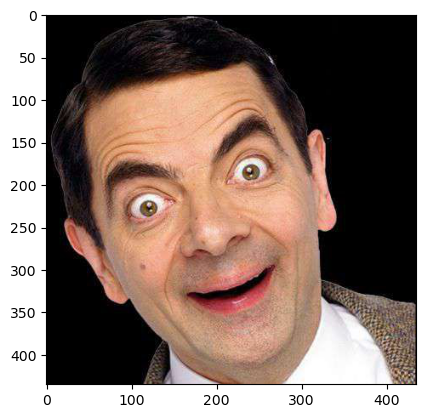

In [3]:
plt.imshow(image)

### Mengubah Citra ke Dalam Grayscale

Perintah di bawah ini digunakan untuk mengubah citra berwarna ke dalam grayscale.Fungsi cvtColor digunakan untuk mengubah gambar ke dalam warna yang diinginkan. 
- Pertama, fungsi akan menerima citra asli yang ditunjukkan oleh image
- Kedua, fungsi akan mengonversikan citra ke dalam bentuk yang diingikan dalam hal ini digunakan cv.COLOR_BGR2GRAY
- Ketiga, hasil color space conversion disimpan ke dalam variable grayimg

In [4]:
grayimg = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

Baris perintah di bawah ini digunakan untuk menampilkan hasil citra yang sudah diubah ke dalam grayscale. Dalam baris perintah ini digunakan library matplotlib, maka harus digunakan colormap (cmap).Apabila tidak menggunakan cmap, maka secara default akan dihasilkan citra dengan warna yang berbeda dari yang telah diolah sebelumnya

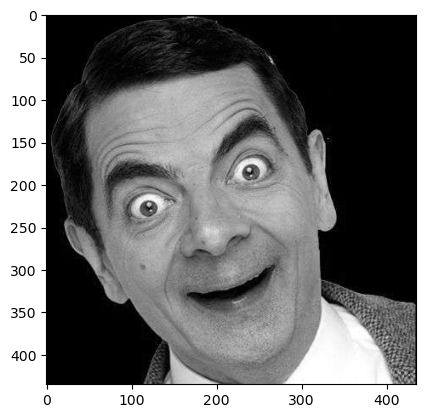

In [5]:
plt.imshow(grayimg,cmap='gray')

### Fungsi Menampilkan Hasil

Fungsi display() digunakan untuk menampilkan hasil pengolahan citra. Hasil keluaran dari fungsi ini ialah perbandingan antara citra sebelum dan sesudah diolah. Untuk menampilkan dua citra sekaligus digunakan fungsi subplots dengan f,ax merujuk pada jumlah baris dan kolom yang diiginkan. Fungsi ini menggunakan parameter result yang merupakan hasil dari citra yang telah diolah

In [6]:
def display(result):
    f, ax = plt.subplots(1,2)
    #membuat subplots dengan 1 baris dan 2 kolom
    ax[0].imshow(grayimg, cmap='gray') 
    #grayscale image
    ax[1].imshow(result, cmap = 'gray') 
    #final operation image
    plt.show()

### Fungsi Translasi

Fungsi trans() digunakan untuk melakukan proses translasi. Pada fungsi ini digunakan 2 paramter, yaitu x_val yang menunjuk pada nilai translasi pada sumbu x dan y_val yang menunjuk pada nilai translasi pada sumbu y. Berikut adalah algoritma kerja fungsi di bawah ini:

- Pertama, nilai masing-masing translasi akan dikurangi dengan indeks sesuai sumbu yang bersesuaian tiap kali dilakukan perulangan (j - nilai translasi pada sumbu x) dan (y - nilai translasi pada sumbu y). Hasil pengurangan akan disimpan pada variabel x dan y.
- Kedua, akan dilakukan pengecekan. Apabila nilai pada variabel x atau y bernilai lebih atau kurang dari ukuran citra asli maka nilai pada variabel result di koordinat[i][j] akan berisi 0.
- Sebaliknya, jika nilai pada variabel x dan y masih berada di dalam ukuran citra asli maka maka nilai pada variabel result di koordinat[i][j] akan berisi nilai dari variabel grayimg pada indeks[y][x]

In [7]:
def trans(x_val,y_val):
    transx = x_val
    #assign value ke dalam variabel transx
    transy = y_val
    #assign value ke dalam variabel transy
    result = np.zeros(((grayimg.shape[0]),(grayimg.shape[1])))
    #membuat array dengan besaran sesuai citra dalam grayscale yang akan diolah dan berisi 0
    for i in range(grayimg.shape[0]):
        for j in range (grayimg.shape[1]):
            x = j - transx
            y = i - transy
            if (x>=0)and(x<=grayimg.shape[1]-1)and(y>=0)and(y<=grayimg.shape[0]-1):
                result[i][j] = grayimg[y][x]
            else:
                result[i][j] = 0
    return result

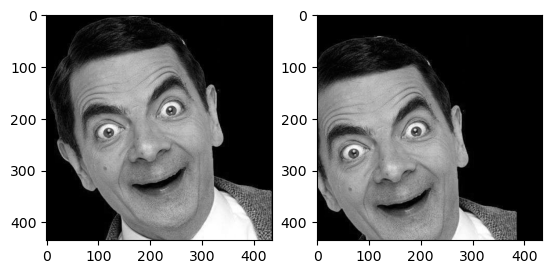

In [8]:
display(trans(-50,40))

### Fungsi Rotasi

Fungsi rotate() digunakan untuk melakukan proses rotasi pada citra. Pada fungsi ini digunakan parameter dengan variabel degree yang menunjukkan besaran sudut pada rotasi yang dilakukan dengan satuan derajat. Berikutnya, sudut dalam satuan derajat diubah ke dalam satuan radian atau rad dengan menggunakan rumus di bawah ini.

- Radians = Degrees × π/180°.

Berikutnya, dicari titik tengah dari sumbu x dan y yang dilambangkan dengan variabel x_cent dan y_cent. Perhitungan rotasi dilakukan dengan berpatokan pada rumus 

- x2 = cos(rad) * (x1-x2) - sin(rad) * (y1-y2) + x0
- y2 = sin(rad) * (x1-x2) + cos(rad) * (y1-y2) + x0

In [9]:
def rotate(degree):
    result   = np.zeros(((grayimg.shape[0]),(grayimg.shape[1])))
    rad      = (degree*np.pi)/180
    x_cent   = image.shape[1]//2
    y_cent   = image.shape[0]//2
    #operator "//" digunakan agar hasil pembagian otomatis berupa bilangan integer (tanpa koma)
    cosa     = cos(rad)
    sina     = sin(rad)
    for i in range(grayimg.shape[0]):
        for j in range (grayimg.shape[1]):
            x = int(cosa*(j-x_cent)-sina*(i-y_cent)+x_cent)
            y = int(sina*(j-x_cent)+cosa*(i-y_cent)+y_cent)
            if (x>=0)and(x<=grayimg.shape[1]-1)and(y>=0)and(y<=grayimg.shape[0]-1):
                result[i][j] = grayimg[y][x]
            else:
                result[i][j] = 0
    return result

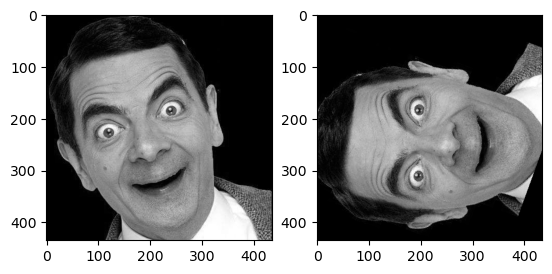

In [10]:
display(rotate(70))

###  Fungsi Pencerminan Sb.X

Fungsi mirrorx() di bawah ini digunakan untuk melakukan pencerminan pada sumbu x. 
- Pertama, didapatkan besaran tinggi dari citra yang akan dilakukan pencerminan.
- Kedua, dikukan perulangan sebanyak besaran lebar dan tinggi citra.
- Dengan berpatokan pada rumus B[x][y] = A[x][M-y]
- Sebagai contoh, pada result [0][0] maka akan diganti nilainya dengan nilai dari grayimg[0][453-0]
- Setiap selesai dilakukan pergantian nilai, nilai dari mirror-=1 akan dikurangi

In [11]:
def mirrorx():
    mirror = grayimg.shape[1]-1
    result = np.zeros(((grayimg.shape[0]),(grayimg.shape[1])))
    for i in range(grayimg.shape[0]):
        for j in range (grayimg.shape[1]):
            result[i][j] = grayimg[i][mirror-j]
            mirror =-1
    return result

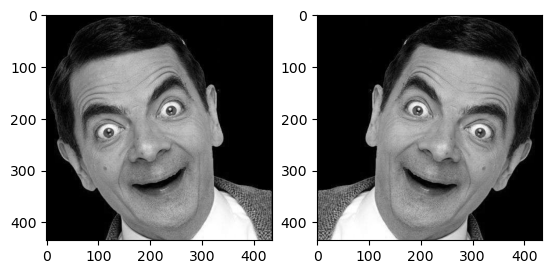

In [12]:
display(mirrorx())

### Fungsi Pencerminan Sb.Y

Fungsi mirrory() di bawah ini digunakan untuk melakukan pencerminan pada sumbu y. 
- Pertama, didapatkan besaran tinggi dari citra yang akan dilakukan pencerminan.
- Kedua, dikukan perulangan sebanyak besaran lebar dan tinggi citra.
- Dengan berpatokan pada rumus B[x][y] = A[M-x][y]
- Sebagai contoh, pada result [0][0] maka akan diganti nilainya dengan nilai dari grayimg[453-0][0]
- Setiap selesai dilakukan pergantian nilai, nilai dari mirror-=1 akan dikurangi

In [13]:
def mirrory():
    mirror = grayimg.shape[0]-1
    result = np.zeros(((grayimg.shape[0]),(grayimg.shape[1])))
    for i in range(grayimg.shape[0]):
        for j in range (grayimg.shape[1]):
            result[i][j] = grayimg[mirror-i][j]
            mirror =-1
    return result

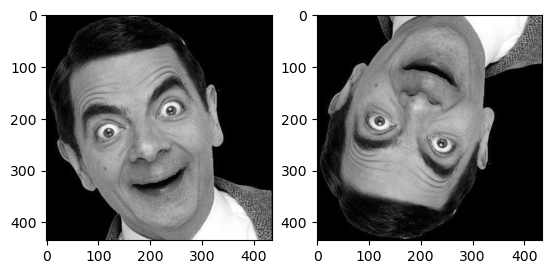

In [14]:
display(mirrory())

### Fungsi Dilatasi

Fungsi scaling() digunakan untuk menghitung operasi dilatasi pada citra dengan menggunakan paramter scale atau nilai perbesaran yang akan dilakukan.Akan disediakan array kosong berukuran "scale * grayimg.shape[0], scale * grayimg.shape[1]" untuk menampung citra yang telah diperbesar. Pada proses dilatasi, dilakukan looping untuk setiap piksel pada citra hasil dilatasi. Setiap piksel pada citra hasil dilatasi akan diisi dengan nilai piksel pada citra asli pada posisi yang telah di-scaling menggunakan faktor skala. Nilai piksel pada posisi citra asli dihitung dengan membagi posisi piksel citra hasil dilatasi dengan faktor skala, lalu diambil nilai bulat dari pembagian tersebut sebagai indeks piksel pada citra asli.

In [15]:
def scaling(scale):
    result = np.zeros(((scale*grayimg.shape[0]),(scale*grayimg.shape[1])))
    print(result.shape)
    for i in range(result.shape[0]):
        #perulangan dilakukan sesuai dengan besaran citra yang baru (sudah dikalikan skala)
        for j in range (result.shape[1]):
            result[i][j] = grayimg[int(i/scale), int(j/scale)]
    return result

(1305, 1305)


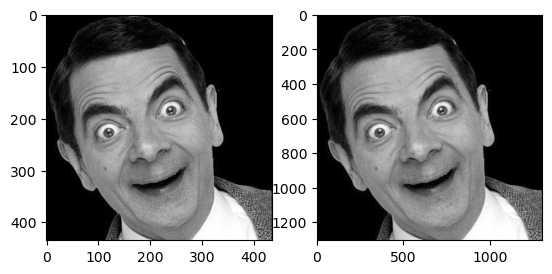

In [16]:
scale = 3
#memasukkan nilai skala yang diiginkan
display(scaling(scale))

### SOAL 2
2. Lakukan Operasi Citra Negatif dari citra grayscale lalu bandingkan Histogram kedua citra tersebut.

### Fungsi untuk Menghitung Intensitas Pixel

Fungsi getShape() digunakan untuk mendapatkan intensitas setiap pixel pada sebuah citra. Pada fungsi ini digunakan parameter img yang menunjuk pada citra yang akan dihitung intensitasnya.Setiap nilai pixel akan dimasukkan ke dalam variabel histogram dan apabila ditemui nilai pixel yang sama lagi maka akan ditambahkan satu

- ex: pada array img[0][0] == 0 maka indeks variabel histogram akan menjadi histogram[0]. Apabila nila pixel ditemukan kembali pada variabel img[x,y] maka akan dilakukan penambahan sebanyak 1 pada variabel histogram.

In [17]:
def getShape(img):
    histogram = np.zeros(256).astype(int)
    for x in range (0,img.shape  [0]):
        for y in range (0,img.shape  [1]):
            histogram[img[x,y]] += 1
    return histogram

### Menghitung Citra Negatif

Bari perintah di bawahini digunakan untuk melakukan proses pembuatan citra negatif. Pada proses ini nilai intensitas pixel dikurangi dengan nilai keabuan maksimum, yaitu 255.

In [18]:
negimg = abs(255-grayimg)

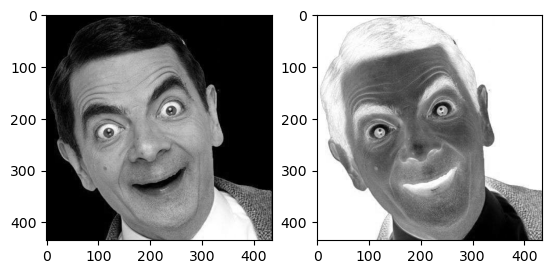

In [19]:
display(negimg)

### Fungsi untuk Menampilkan Histogram

Fungsi di bawah ini digunakan untuk membuat multiple bar pada sebuah plot. Pada fungsi ini nantinya akan ditampikan histogram dari citra grayscale dan citra negatif yang telah diketahui intensitasnya dengan memanggil fungsi getShape.

In [20]:
def histogram():
    x_axis = [i for i in range (256)]
    y_gray = getShape(grayimg)
    y_neg  = getShape(negimg)
    
    plt.bar(x_axis, y_gray, label= 'Grayscale Image')
    plt.bar(x_axis, y_neg, label= 'Negative Image')
    
    plt.xlabel ("Pixels")
    plt.ylabel("Number of Pixel")
    plt.title("Comparison of Grayscale and Negative Image")
    plt.legend()
    plt.show()

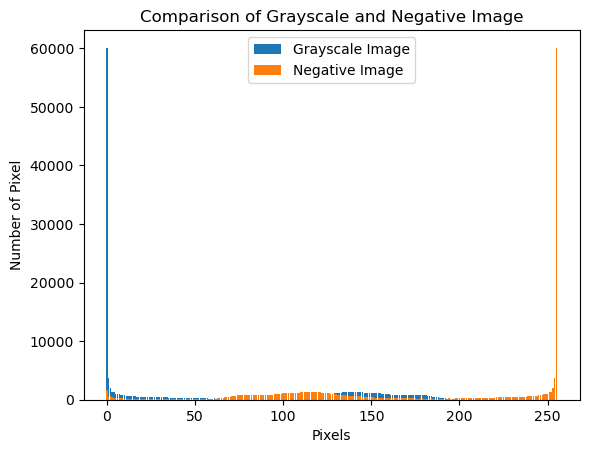

In [21]:
histogram()

Berdasarkan hasil histogram di atas dapat diketahui bahwa histogram citra grayscale cenderung berada pada sebelah kiri (dark image) dan sebalikanya untuk citra negatif yang cenderung berada pada sebelah kanan (bright image).